In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bus_routes_df = pd.read_csv('data/routes_to_neighborhoods_new.csv')
census_data = pd.read_csv('data/census_data.csv')

In [4]:
bus_routes_df.head()

,route_id,stop_id,neighborhood
0,01,"[2, 59, 62, 64, 79, 93, 187, 188, 10590]","['Roxbury', 'South End', 'Roxbury', 'Roxbury',..."
1,04,"[113, 114, 117, 190, 214, 224, 236, 892, 6564,...","['West End', 'West End', 'Downtown', 'Downtown..."
2,07,"[33, 879, 886, 889, 890, 892, 6564, 16535, 16538]","['South Boston Waterfront', 'South Boston', 'S..."
3,08,"[64, 111, 121, 123, 134, 142, 899, 1518, 1563,...","['Roxbury', 'Dorchester', 'Dorchester', 'Dorch..."
4,09,"[13, 21, 25, 33, 41, 45, 148, 150, 151, 175, 8...","['South Boston', 'South Boston', 'South Boston..."


In [5]:
bus_routes_df['neighborhood'] = bus_routes_df['neighborhood'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))

# Explode the 'Neighborhoods' column
bus_routes_exploded = bus_routes_df.explode('neighborhood')

In [6]:
bus_routes_exploded

,route_id,stop_id,neighborhood
0,01,"[2, 59, 62, 64, 79, 93, 187, 188, 10590]",Roxbury
0,01,"[2, 59, 62, 64, 79, 93, 187, 188, 10590]",South End
0,01,"[2, 59, 62, 64, 79, 93, 187, 188, 10590]",Roxbury
0,01,"[2, 59, 62, 64, 79, 93, 187, 188, 10590]",Roxbury
0,01,"[2, 59, 62, 64, 79, 93, 187, 188, 10590]",Fenway
...,...,...,...
93,SL5,"[5, 55, 64, 5095, 5098, 6565, 49001, 49002]",South End
93,SL5,"[5, 55, 64, 5095, 5098, 6565, 49001, 49002]",South End
93,SL5,"[5, 55, 64, 5095, 5098, 6565, 49001, 49002]",Chinatown
93,SL5,"[5, 55, 64, 5095, 5098, 6565, 49001, 49002]",Downtown


In [7]:
census_data.columns

Index(['tract20_nbhd', 'P0020001', 'P0020005', 'P0020006', 'P0020002',
       'P002aapi', 'P002others', 'P0040001', 'P0040005', 'P0040006',
       'P0040002', 'P004aapi', 'P004others', 'P00x0001', 'P00x0005',
       'P00x0006', 'P00x0002', 'P00xaapi', 'P00xothers', 'hhpop', 'P0050001',
       'P0050002', 'P0050003', 'P0050004', 'P0050005', 'P0050006', 'P0050007',
       'P0050008', 'P0050009', 'P0050010', 'H0010001', 'H0010002', 'H0010003',
       'hhsize', 'zipcode'],
      dtype='object')

In [8]:
merged_df = pd.merge(bus_routes_exploded, census_data, left_on='neighborhood', right_on='tract20_nbhd')

In [9]:
merged_df.head()

,route_id,stop_id,neighborhood,tract20_nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,...,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize,zipcode
0,01,"[2, 59, 62, 64, 79, 93, 187, 188, 10590]",Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
1,01,"[2, 59, 62, 64, 79, 93, 187, 188, 10590]",Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
2,01,"[2, 59, 62, 64, 79, 93, 187, 188, 10590]",Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
3,01,"[2, 59, 62, 64, 79, 93, 187, 188, 10590]",Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
4,08,"[64, 111, 121, 123, 134, 142, 899, 1518, 1563,...",Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119


In [11]:
merged_df['P0020001'] = pd.to_numeric(merged_df['P0020001'], errors='coerce')
merged_df['P0020005'] = pd.to_numeric(merged_df['P0020005'], errors='coerce')
merged_df['P0020006'] = pd.to_numeric(merged_df['P0020006'], errors='coerce')
merged_df['P0020002'] = pd.to_numeric(merged_df['P0020002'], errors='coerce')
merged_df['P002aapi'] = pd.to_numeric(merged_df['P002aapi'], errors='coerce')
merged_df['P002others'] = pd.to_numeric(merged_df['P002others'], errors='coerce')


In [12]:
merged_df.columns

Index(['route_id', 'stop_id', 'neighborhood', 'tract20_nbhd', 'P0020001',
       'P0020005', 'P0020006', 'P0020002', 'P002aapi', 'P002others',
       'P0040001', 'P0040005', 'P0040006', 'P0040002', 'P004aapi',
       'P004others', 'P00x0001', 'P00x0005', 'P00x0006', 'P00x0002',
       'P00xaapi', 'P00xothers', 'hhpop', 'P0050001', 'P0050002', 'P0050003',
       'P0050004', 'P0050005', 'P0050006', 'P0050007', 'P0050008', 'P0050009',
       'P0050010', 'H0010001', 'H0010002', 'H0010003', 'hhsize', 'zipcode'],
      dtype='object')

In [13]:
# Grouping by 'Route' and summing the numeric values in 'P0020001' column
grouped_data = merged_df.groupby('route_id')['P0020001'].sum()

In [14]:
grouped_data.head()

route_id
01     373116
04     153449
07     147643
08    1222994
09     535140
Name: P0020001, dtype: int64

In [15]:
# Get the top 10 routes with maximum population
top_routes_max_population = grouped_data.nlargest(10)

# Get the top 10 routes with minimum population
top_routes_min_population = grouped_data.nsmallest(10)


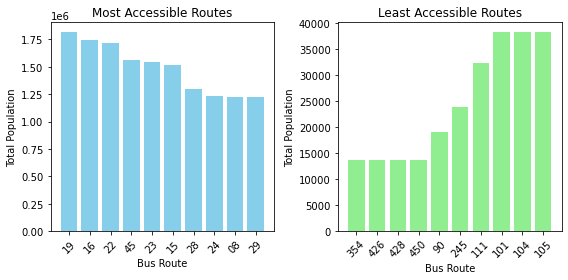

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plotting top 10 routes with maximum population
axes[0].bar(top_routes_max_population.index, top_routes_max_population.values, color='skyblue')
axes[0].set_title('Most Accessible Routes')
axes[0].set_xlabel('Bus Route')
axes[0].set_ylabel('Total Population')
axes[0].tick_params(axis='x', rotation=45)

# Plotting top 10 routes with minimum population
axes[1].bar(top_routes_min_population.index, top_routes_min_population.values, color='lightgreen')
axes[1].set_title('Least Accessible Routes')
axes[1].set_xlabel('Bus Route')
axes[1].set_ylabel('Total Population')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [21]:
grouped_data1 = merged_df.groupby('route_id').agg({
    'P0020001': 'sum',  # Total population
    'P0020005': 'sum',
    'P0020006': 'sum',
     'P0020002': 'sum',
     'P002aapi': 'sum',
    'P002others' : 'sum'

    # Add other population characteristics you want to analyze
})

In [22]:
new_column_names = {
    'P0020001': 'Total Population',
    'P0020005': 'White alone',
    'P0020006': 'Black or African American alone',
    'P0020002': 'Hispanic or Latino',
    'P002aapi': 'Asian, Native Hawaiian and Pacific Islander alone, all ages',
    'P002others' : 'Other Races'

}

# Rename the columns using the 'rename()' function
grouped_data1.rename(columns=new_column_names, inplace=True)

In [23]:
grouped_data1.columns

Index(['Total Population', 'White alone', 'Black or African American alone',
       'Hispanic or Latino',
       'Asian, Native Hawaiian and Pacific Islander alone, all ages',
       'Other Races'],
      dtype='object')

Index(['Total Population', 'White alone', 'Black or African American alone',
       'Hispanic or Latino',
       'Asian, Native Hawaiian and Pacific Islander alone, all ages',
       'Other Races'],
      dtype='object')


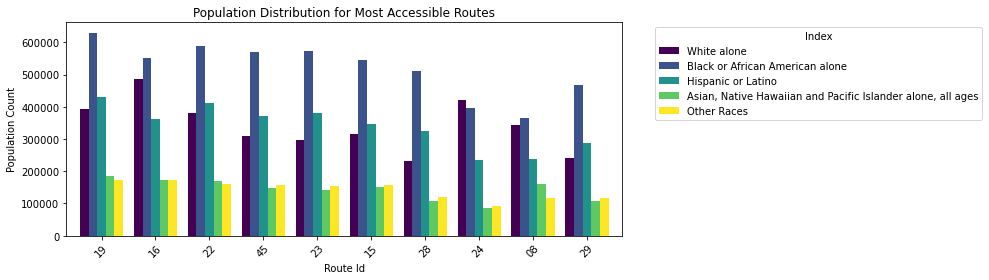

In [24]:
# Get the top 10 routes with maximum total population
top_routes_max_population = grouped_data1['Total Population'].nlargest(10)

# Extract data for the top 10 routes from the grouped data
top_routes_data = grouped_data1.loc[top_routes_max_population.index]
print(top_routes_data.columns)
top_routes_data.drop('Total Population', inplace=True, axis=1)
top_routes_data_renamed = top_routes_data
# top_routes_data_renamed.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

# Transpose the DataFrame for better plotting (rows become columns)
# top_routes_data = top_routes_data.T

# Plotting grouped bar chart for top 10 routes' population distribution
top_routes_data.plot(kind='bar', figsize=(14,4), colormap='viridis',width=0.8)
plt.xlabel('Route Id')
plt.ylabel('Population Count')
plt.title('Population Distribution for Most Accessible Routes')
plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

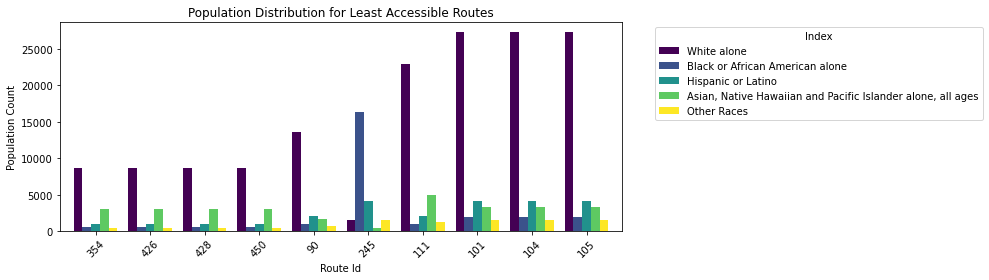

In [25]:
# Get the top 10 routes with maximum total population
top_routes_min_population = grouped_data1['Total Population'].nsmallest(10)

# Extract data for the top 10 routes from the grouped data
top_routes_data1 = grouped_data1.loc[top_routes_min_population.index]
top_routes_data1.drop('Total Population', inplace=True, axis=1)

# Transpose the DataFrame for better plotting (rows become columns)
# top_routes_data = top_routes_data.T

# Plotting grouped bar chart for top 10 routes' population distribution
top_routes_data1.plot(kind='bar', figsize=(14,4), colormap='viridis',width=0.8)
plt.xlabel('Route Id')
plt.ylabel('Population Count')
plt.title('Population Distribution for Least Accessible Routes')
plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Grouping the data by 'Route' and summing up the ethnic columns for each route
grouped = merged_df.groupby('route_id').sum()
grouped

,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others
route_id,,,,,,
01,373116,117037,102370,82866,43468,27375
04,153449,101281,6028,10542,29434,6164
07,147643,106143,5814,12590,17672,5424
08,1222994,342117,364353,239252,160131,117141
09,535140,370083,28276,53977,61134,21670
...,...,...,...,...,...,...
CT3,466588,127060,146279,116047,41645,35557
SL1,295687,135195,9842,113613,22088,14949
SL2,72168,51980,2418,4462,9892,3416


In [27]:
# Calculating the count of unique neighborhoods for each route
route_neighborhood_count = merged_df.groupby('route_id')['neighborhood'].nunique()

# Extracting top 5 routes with the largest counts of unique neighborhoods
top_routes = route_neighborhood_count.nlargest(5).index

In [38]:
route_neighborhood_count.nlargest(5)

route_id
192    9
34     7
08     6
09     6
10     6
Name: neighborhood, dtype: int64

In [74]:
top_routes

Index(['192', '34', '08', '09', '10'], dtype='object', name='route_id')

In [29]:
grouped=grouped.drop(columns='P0020001')

<Figure size 720x576 with 0 Axes>

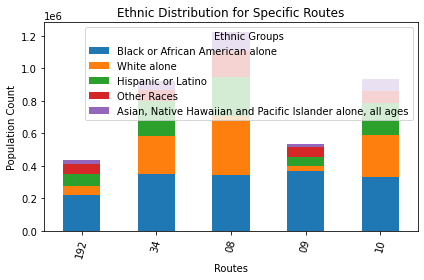

In [58]:
# Selecting ethnic columns for pie chart
ethnic_columns = ['P0020005', 'P0020006', 'P0020002', 'P002aapi', 'P002others']
ethnic_labels = {
    'White alone',
    'Black or African American alone',
    'Hispanic or Latino',
    'Asian, Native Hawaiian and Pacific Islander alone, all ages',
    'Other Races'
}

# Filtering rows based on specific indices
filtered_routes = grouped.loc[['192', '34', '08', '09', '10'], ethnic_columns]

renaming_dict = dict(zip(ethnic_columns, ethnic_labels))
filtered_routes = filtered_routes.rename(columns=renaming_dict)

# Plotting stacked bar chart for ethnic distribution of filtered routes
plt.figure(figsize=(10, 8))
filtered_routes.plot(kind='bar', stacked=True, width=0.5)

# Adding legend and labels
plt.legend(title='Ethnic Groups')
plt.xlabel('Routes')
plt.ylabel('Population Count')
plt.title('Ethnic Distribution for Specific Routes')
plt.xticks(range(len(filtered_routes.index)), filtered_routes.index, rotation=75)
plt.tight_layout()
plt.show()

In [81]:
neighborhood_route_count=pd.read_csv("data/neighborhoods_to_routes_new.csv")
neighborhood_route_count.head()

,neighborhood,stop_id,route_id
0,Allston,"[922, 922, 925, 925, 926, 926, 926, 926, 931, ...","['66', '57', '57', '66', '57', '66', '193', '5..."
1,Back Bay,"[93, 175, 175, 175, 176, 178, 178, 178, 178, 1...","['01', '09', '10', '39', '10', '10', '55', '19..."
2,Beacon Hill,"[10000, 10000]","['43', '192']"
3,Brighton,"[912, 912, 912, 913, 918, 918, 918, 966, 966, ...","['57', '193', '66', '57', '57', '193', '66', '..."
4,Charlestown,"[2821, 2835, 2844, 2844, 2850, 2855, 2855, 286...","['92', '92', '194', '93', '93', '194', '93', '..."


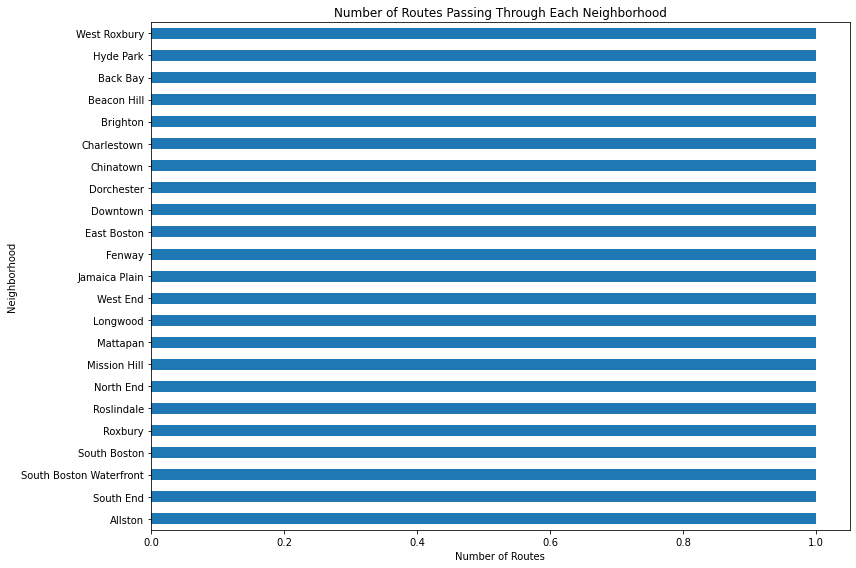

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'neighborhood_data' is your DataFrame

# Create a copy of the DataFrame to avoid altering the original data
neighborhood_data_copy = neighborhood_route_count.copy()

# Count the number of unique route IDs per neighborhood
routes_count_per_neighborhood = neighborhood_data_copy.explode('route_id').groupby('neighborhood')['route_id'].nunique()

# Plotting the number of routes passing through each neighborhood
plt.figure(figsize=(12, 8))
routes_count_per_neighborhood.sort_values().plot(kind='barh')
plt.xlabel('Number of Routes')
plt.ylabel('Neighborhood')
plt.title('Number of Routes Passing Through Each Neighborhood')
plt.tight_layout()
plt.show()
